## 任务4 - 模型评估（2天）
任务4：记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。时间：2天

可以参照以下格式：![图片](https://uploader.shimo.im/f/Pw3BNUE8eoQYuzf0.png!thumbnail)


[参考答案](./../参考答案)

|      |      |      |
| ---- | ---- | ---- |
|      |      |      |
|      |      |      |
|      |      |      |

## 数据集预览

In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 载入数据
with open('final.pkl', 'rb') as f:
    final_data = pickle.load(f)
# data = pd.read_csv("./data.csv",encoding='gbk')
# y=data.status
# 划分训练集测试集
X, y = final_data[final_data.columns.drop("status")], final_data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)


# 特征归一化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


### LR模型

In [2]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

D:\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### SVM模型



In [3]:
from sklearn import svm

svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

### 决策树模型

> 树模型，特征不需归一化。

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### XGBoost模型

In [5]:
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

### LightGBM模型

In [6]:
from lightgbm.sklearn import LGBMClassifier

lgb= LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 模型调参

In [7]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr_param = {'penalty': ('l1', 'l2'), 'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(lr, param_grid = lr_param, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)

({'penalty': 'l2', 'C': 0.01}, 0.7944093778178539)


## 模型评估

> 观察accuracy、precision，recall和f1-score、auc的取值，并画出roc曲线图

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
model_score_train = []
roc_score_train = []
model_score_test = []
roc_score_test = []

In [9]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print(u'[准确率]')
    print(u'训练集：'+ '%.4f'%accuracy_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print(u'[精准率]')
    print(u'训练集：'+ '%.4f'%precision_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print(u'[召回率]')
    print(u'训练集：'+ '%.4f'%recall_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print(u'[f1-score]')
    print(u'训练集：'+ '%.4f'%f1_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print(u'[auc值]')
    print(u'训练集：'+ '%.4f'%roc_auc_score(y_train, y_train_proba))
    print(u'测试集：'+ '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率]
训练集：0.8034
测试集：0.7842
[精准率]
训练集：0.7045
测试集：0.6457
[召回率]
训练集：0.3717
测试集：0.3148
[f1-score]
训练集：0.4867
测试集：0.4232
[auc值]
训练集：0.8198
测试集：0.7677


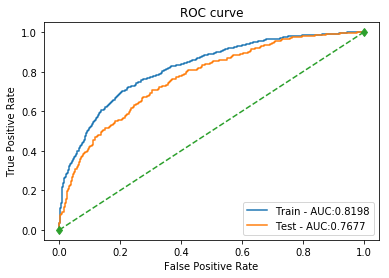

In [10]:
# 逻辑回归
model_metrics(lr2, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8049
测试集：0.7779
[精准率]
训练集：0.7829
测试集：0.6667
[召回率]
训练集：0.3070
测试集：0.2340
[f1-score]
训练集：0.4410
测试集：0.3464
[auc值]
训练集：0.8179
测试集：0.7757


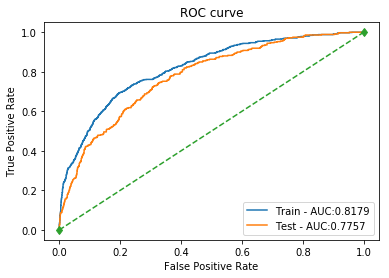

In [11]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8284
测试集：0.7519
[精准率]
训练集：0.9747
测试集：0.5316
[召回率]
训练集：0.3237
测试集：0.1170
[f1-score]
训练集：0.4860
测试集：0.1918
[auc值]
训练集：0.9546
测试集：0.7123


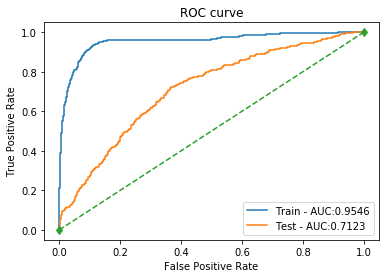

In [12]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8392
测试集：0.7779
[精准率]
训练集：0.9051
测试集：0.6875
[召回率]
训练集：0.4005
测试集：0.2145
[f1-score]
训练集：0.5553
测试集：0.3270
[auc值]
训练集：0.9168
测试集：0.7519


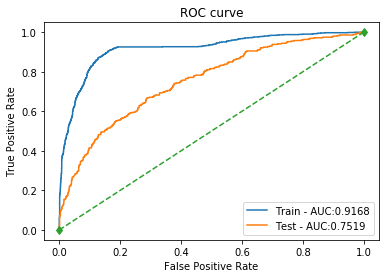

In [13]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.7313
测试集：0.7302
[精准率]
训练集：0.4552
测试集：0.4526
[召回率]
训练集：0.3657
测试集：0.3454
[f1-score]
训练集：0.4056
测试集：0.3918
[auc值]
训练集：0.6464
测试集：0.6612


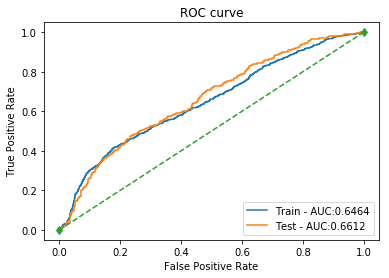

In [14]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8055
测试集：0.7603
[精准率]
训练集：0.6761
测试集：0.5347
[召回率]
训练集：0.4305
测试集：0.3649
[f1-score]
训练集：0.5260
测试集：0.4338
[auc值]
训练集：0.7752
测试集：0.6954


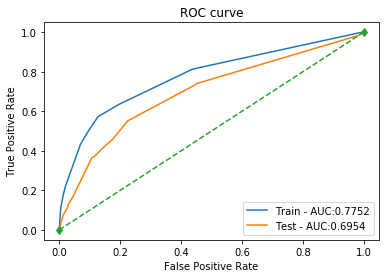

In [15]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8503
测试集：0.7821
[精准率]
训练集：0.8636
测试集：0.6176
[召回率]
训练集：0.4784
测试集：0.3510
[f1-score]
训练集：0.6157
测试集：0.4476
[auc值]
训练集：0.9183
测试集：0.7695


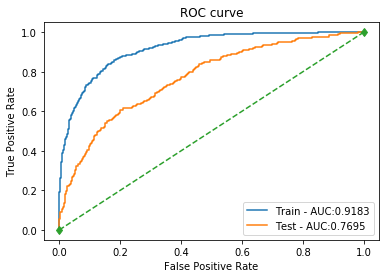

In [16]:
# XGBoost
model_metrics(xgb, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.9946
测试集：0.7722
[精准率]
训练集：1.0000
测试集：0.5810
[召回率]
训练集：0.9784
测试集：0.3398
[f1-score]
训练集：0.9891
测试集：0.4288
[auc值]
训练集：1.0000
测试集：0.7605


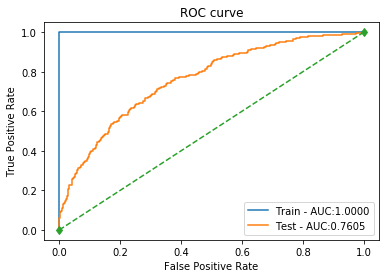

In [17]:
# lightGBM
model_metrics(lgb, X_train, X_test, y_train, y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'table'

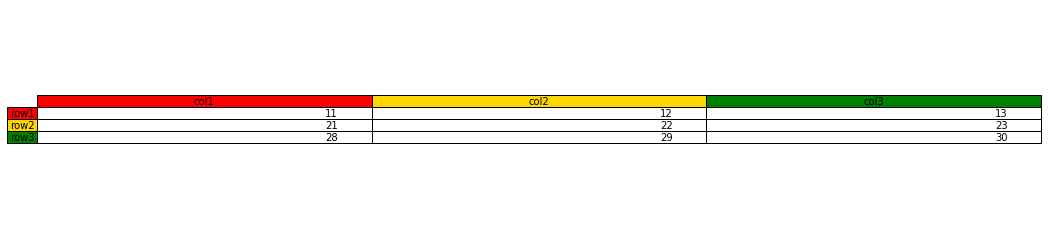

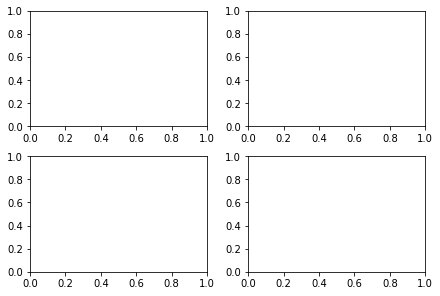

In [72]:
col_labels = ['col1','col2','col3']
row_labels = ['row1','row2','row3']
table_vals = [[11,12,13],[21,22,23],[28,29,30]]
row_colors = ['red','gold','green']

fig, ax = plt.subplots()
ax.axis('off')

my_table = ax.table(cellText=table_vals, colWidths=[1]*3,
                     rowLabels=row_labels, colLabels=col_labels,
                     rowColours=row_colors, colColours=row_colors,
                     loc='center')
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)


my_table2 = f1_axes.table(cellText=table_vals, colWidths=[1]*3,
                     rowLabels=row_labels, colLabels=col_labels,
                     rowColours=row_colors, colColours=row_colors,
                     loc='center')



|             | 准确率                        | 精准率                        | 召回率 | F1   | AUC  |
| ----------- | ----------------------------- | ----------------------------- | ------ | ---- | ---- |
| LR          |                               |                               |        |      |      |
| svm_linear  |                               |                               |        |      |      |
| svm_poly    |                               |                               |        |      |      |
| svm_rbf     |                               |                               |        |      |      |
| svm_sigmoid |                               |                               |        |      |      |
| dt          |                               |                               |        |      |      |
| xgb         |                               |                               |        |      |      |
| lgb         | 训练集：0.9946 测试集：0.7722 | 训练集：1.0000 测试集：0.5810 |        |      |      |

